# Two Layer Neural Network for Non-Linear Classification
**Author:** Dr. Rishikesh Yadav / Vedant Vibhor  

This notebook demonstrates the implementation of a simple neural network for non-linear classification.  
We will:
1. Generate and visualize synthetic data  
2. Define the neural network and its components  
3. Train the neural network  
4. Evaluate the neural network  
5. Visualize the results

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# We will use sklearn to split the data into training and testing sets later
from sklearn.model_selection import train_test_split

## Generate Synthetic Data

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 1000

# Generate features x1 and x2 from a standard normal distribution
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)

# Generate labels: points inside a noisy circle are class 0, outside are class 1
y = ((x1**2 + x2**2 + np.random.normal(0, 1, n)) > 1.5).astype(int)

# Combine into a DataFrame for convenience
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

## Visualize the Data

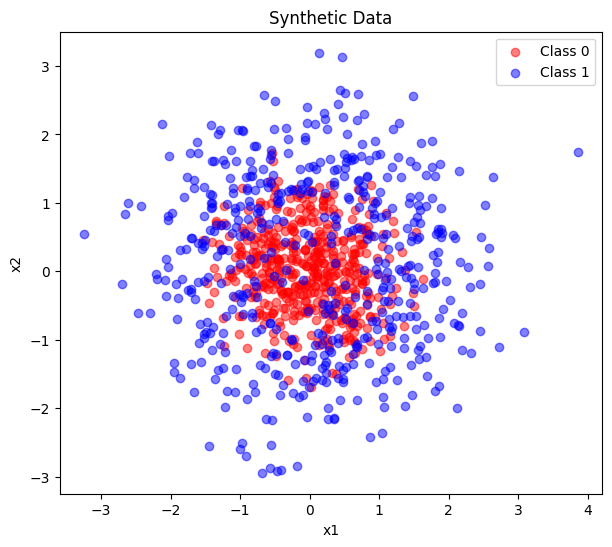

In [3]:
# Scatter plot of the two classes
plt.figure(figsize=(7,6))
plt.scatter(data[data.y==0].x1, data[data.y==0].x2, color='red', alpha=0.5, label='Class 0')
plt.scatter(data[data.y==1].x1, data[data.y==1].x2, color='blue', alpha=0.5, label='Class 1')
plt.title("Synthetic Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Split Data into Training and Testing Sets

In [4]:
# 70% train, 30% test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

## Define Neural Network Components

In [5]:
# Sigmoid activation function
def sigmoid(z):
    """Compute the sigmoid activation."""
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(z):
    """Compute the derivative of the sigmoid activation."""
    s = sigmoid(z)
    return s * (1 - s)

# Forward propagation for a two-layer neural network
def forward_propagation(X, W1, b1, W2, b2):
    """
    Perform forward propagation through the network.
    X: Input data, shape (m, input_dim)
    W1, b1: Weights and bias for hidden layer
    W2, b2: Weights and bias for output layer
    Returns: cache dictionary with intermediate values
    """
    Z1 = X @ W1 + b1           # Linear step for hidden layer
    A1 = sigmoid(Z1)           # Activation for hidden layer
    Z2 = A1 @ W2 + b2          # Linear step for output layer
    A2 = sigmoid(Z2)           # Activation for output layer
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return cache

# Mean squared error loss
def compute_loss(Y, A2):
    """Compute mean squared error loss."""
    return np.mean((Y - A2) ** 2)

# Backward propagation for a two-layer neural network
def backward_propagation(X, Y, W1, b1, W2, b2, cache):
    """
    Compute gradients for all weights and biases.
    Returns: dictionary of gradients
    """
    m = X.shape[0]
    Z1, A1, Z2, A2 = cache['Z1'], cache['A1'], cache['Z2'], cache['A2']
    dZ2 = A2 - Y                                # Derivative of loss w.r.t. Z2
    dW2 = A1.T @ dZ2 / m                        # Gradient for W2
    db2 = np.mean(dZ2, axis=0)                  # Gradient for b2
    dZ1 = (dZ2 @ W2.T) * sigmoid_derivative(Z1) # Derivative of loss w.r.t. Z1
    dW1 = X.T @ dZ1 / m                         # Gradient for W1
    db1 = np.mean(dZ1, axis=0)                  # Gradient for b1
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

## Train the Neural Network

In [6]:
def train_neural_network(X, Y, hidden_units=10, learning_rate=0.1, iterations=50000, verbose=False):
    """
    Train a two-layer neural network using gradient descent.
    Returns: trained model (weights, biases, loss history)
    """
    input_units = X.shape[1]      # Number of input features
    output_units = 1              # Output is binary (0 or 1)

    # Initialize weights and biases with small random values
    W1 = np.random.randn(input_units, hidden_units) * 0.1
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, output_units) * 0.1
    b2 = np.zeros((1, output_units))

    loss_history = []

    for i in range(iterations):
        # Forward pass
        cache = forward_propagation(X, W1, b1, W2, b2)
        A2 = cache['A2']

        # Compute loss
        loss = compute_loss(Y, A2)
        loss_history.append(loss)

        # Backward pass
        grads = backward_propagation(X, Y, W1, b1, W2, b2, cache)

        # Update weights and biases using gradient descent
        W1 -= learning_rate * grads['dW1']
        b1 -= learning_rate * grads['db1']
        W2 -= learning_rate * grads['dW2']
        b2 -= learning_rate * grads['db2']

        # Print loss every 5000 iterations if verbose is True
        if verbose and (i+1) % 5000 == 0:
            print(f"Iteration {i+1}, Loss: {loss:.4f}")

    # Return the trained parameters and loss history
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'loss_history': loss_history}
    return model

# Prepare input features and labels for training
X_train = train_data[['x1', 'x2']].values
Y_train = train_data['y'].values.reshape(-1,1)

# Set hyperparameters
hidden_units = 10
learning_rate = 0.1
iterations = 50000

# Train the neural network
model = train_neural_network(X_train, Y_train, hidden_units, learning_rate, iterations, verbose=True)

Iteration 5000, Loss: 0.1991
Iteration 10000, Loss: 0.1326
Iteration 15000, Loss: 0.1277
Iteration 20000, Loss: 0.1269
Iteration 25000, Loss: 0.1267
Iteration 30000, Loss: 0.1265
Iteration 35000, Loss: 0.1264
Iteration 40000, Loss: 0.1263
Iteration 45000, Loss: 0.1263
Iteration 50000, Loss: 0.1263


## Plot Loss Over Iterations

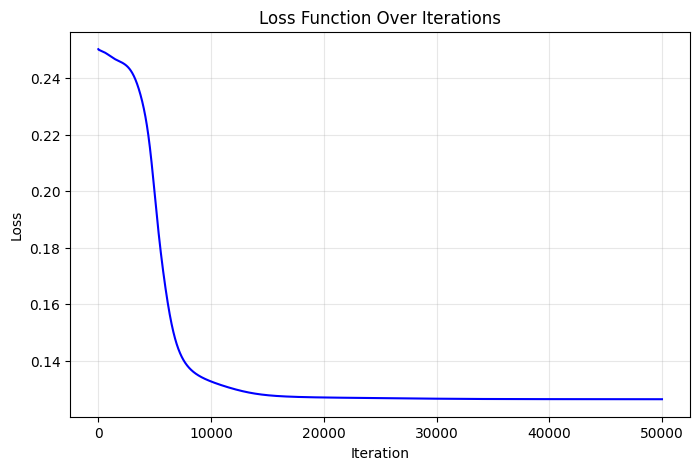

In [7]:
# Plot the loss curve to show training progress
plt.figure(figsize=(8,5))
plt.plot(range(1, iterations+1), model['loss_history'], color='blue')
plt.title("Loss Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.show()

## Make Predictions on the Test Set

In [8]:
# Prepare test data
X_test = test_data[['x1', 'x2']].values
Y_test = test_data['y'].values.reshape(-1,1)

# Forward pass on test data
cache_test = forward_propagation(X_test, model['W1'], model['b1'], model['W2'], model['b2'])
A2_test = cache_test['A2']

# Convert probabilities to binary predictions (threshold 0.5)
test_predictions = (A2_test > 0.5).astype(int)

# Evaluate performance using confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, test_predictions)
acc = accuracy_score(Y_test, test_predictions)
print("Confusion Matrix:\n", cm)
print("Accuracy: {:.4f}".format(acc))

Confusion Matrix:
 [[127  22]
 [ 30 121]]
Accuracy: 0.8267


## Plot the Decision Boundary

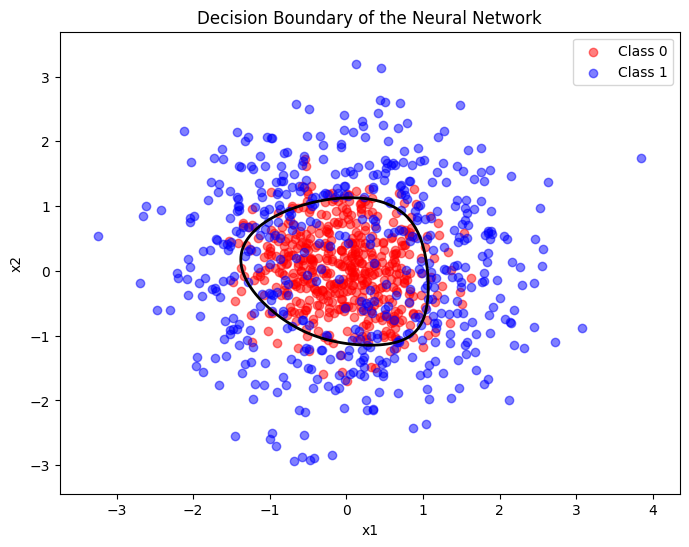

In [9]:
# Create a mesh grid for plotting decision boundary
x1_min, x1_max = data.x1.min() - 0.5, data.x1.max() + 0.5
x2_min, x2_max = data.x2.min() - 0.5, data.x2.max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Predict probabilities for each point in the grid
cache_grid = forward_propagation(grid_points, model['W1'], model['b1'], model['W2'], model['b2'])
A2_grid = cache_grid['A2'].reshape(xx1.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8,6))
plt.scatter(data[data.y==0].x1, data[data.y==0].x2, color='red', alpha=0.5, label='Class 0')
plt.scatter(data[data.y==1].x1, data[data.y==1].x2, color='blue', alpha=0.5, label='Class 1')
plt.contour(xx1, xx2, A2_grid, levels=[0.5], colors='k', linewidths=2)
plt.title("Decision Boundary of the Neural Network")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Conclusion

In this notebook, we implemented a simple two-layer neural network for non-linear classification using synthetic data.  
We generated the data, visualized it, defined the neural network, trained it, evaluated its performance, and visualized the results, including the decision boundary.